<a href="https://colab.research.google.com/github/angelicapu/SNA/blob/master/Data_Characterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load of the dataset

In [0]:
!pip install networkx

In [0]:
!pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24787 sha256=2213d85b47159fa0e6b7ca4ca4693ca5991b8df4d94f95546a0c4cbdbd17757b
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [0]:
# imports 
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import defaultdict
from scipy.stats.stats import pearsonr
import networkx as nx
import warnings
import powerlaw
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/drive')
directory = '/content/drive/My Drive/Progetto_SNA/Data_Collection'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
rawNet = pd.read_csv(directory+"/data/UserNetwork.csv")
rawNet.head()

,Source,Target,Type,Kind,Id,Label,timeset,Weight
0,@hallidaydaniel,@joebilsborough,Directed,Mention,0,NaN,<[2020-05-24T07:14:37.812Z]>,1
1,@hallidaydaniel,@joebilsborough,Directed,Retweet,1,NaN,<[2020-05-24T07:14:37.824Z]>,1
2,@evanthorizon,@realmarklatham,Directed,Quote,2,NaN,<[2020-05-24T07:14:37.834Z]>,1
3,@getupthere,@mchooyah,Directed,Mention,3,NaN,<[2020-05-24T07:14:37.856Z]>,1
4,@getupthere,@mchooyah,Directed,Retweet,4,NaN,<[2020-05-24T07:14:37.858Z]>,1


# Network Understanding

https://networkx.github.io/documentation/latest/

## Network Creation as Directed Graph

Da aggiungere gli attributi: per ora, solo Source e Target, le colonne che stabiliscono i nodi e gli archi tra i nodi

In [0]:
#g = nx.read_edgelist(directory+"/data/UserNetwork.csv", delimiter=",")#, nodetype=int)

In [0]:
rawList=[]
for i in range(len(rawNet)):
  rawList.append([rawNet['Source'][i],rawNet['Target'][i]]) 

In [0]:
G = nx.DiGraph(rawList)

In [0]:
n=G.nodes()
n

NodeView(('@hallidaydaniel', '@joebilsborough', '@evanthorizon', '@realmarklatham', '@getupthere', '@mchooyah', '@mcsmiccf', '@angusreidorg', '@lisas00445168', '@official_jo1', '@martinamcderm16', '@annaannana1', '@peterstefanovi2', '@destiny_ann13', '@lukesharptv', '@nefeerr', '@europapress', '@schnauzevoll61', '@olivergorus', '@rcpwells', '@sationhund', '@jolyonmaugham', '@juancarcubeiro', '@joseignaciowert', '@garciaaller', '@eldebatedehoy', '@martagbruno', '@pablo_casado', '@naveenpagadala4', '@pawankatreddi', '@pawankalyan', '@janasenaparty', '@thesettipalli', '@drsandeepjsp', '@nigeria_first_', '@governormasari', '@aleahbesad', '@naouma_', '@ashleyneenu', '@mikeishadache', '@anifam', '@nenneko889', '@okashi_kastmar', '@intheshadowsic', '@sarajoh05195047', '@thanchanokchua', '@sudaratofficial', '@zimmedarvyakti', '@arya_star12', '@gardeniagrl8', '@repandybiggsaz', '@agporche', '@marcgozlan', '@alex201325', '@audisport', '@autodromo_monza', '@jordanugupdates', '@mkainerugaba', '@ju

In [0]:
e=G.edges()
e

OutEdgeView([('@hallidaydaniel', '@joebilsborough'), ('@evanthorizon', '@realmarklatham'), ('@getupthere', '@mchooyah'), ('@mcsmiccf', '@angusreidorg'), ('@mcsmiccf', '@michaelcburgess'), ('@mcsmiccf', '@selectgop'), ('@mcsmiccf', '@repstephmurphy'), ('@mcsmiccf', '@cnni'), ('@mcsmiccf', '@repbillflores'), ('@mcsmiccf', '@secpompeo'), ('@mcsmiccf', '@repannwagner'), ('@mcsmiccf', '@tedcruz'), ('@mcsmiccf', '@michaeljohns'), ('@mcsmiccf', '@senatorromney'), ('@mcsmiccf', '@sentomcotton'), ('@mcsmiccf', '@jackhhazlewood'), ('@mcsmiccf', '@theatlantic'), ('@mcsmiccf', '@tmclaughlin3'), ('@lisas00445168', '@official_jo1'), ('@martinamcderm16', '@annaannana1'), ('@martinamcderm16', '@peterstefanovi2'), ('@martinamcderm16', '@lecanardnoir'), ('@martinamcderm16', '@istajan'), ('@martinamcderm16', '@mccoll_lorraine'), ('@annaannana1', '@peterstefanovi2'), ('@destiny_ann13', '@lukesharptv'), ('@nefeerr', '@europapress'), ('@nefeerr', '@raffiovalentina'), ('@nefeerr', '@cnnee'), ('@schnauzevoll6

In [0]:
G.number_of_nodes()

21001

In [0]:
G.number_of_edges()

24359

In [0]:
nx.number_of_selfloops(G)

0

In [0]:
G.is_directed()

True

Calculating best minimal value for power law fit


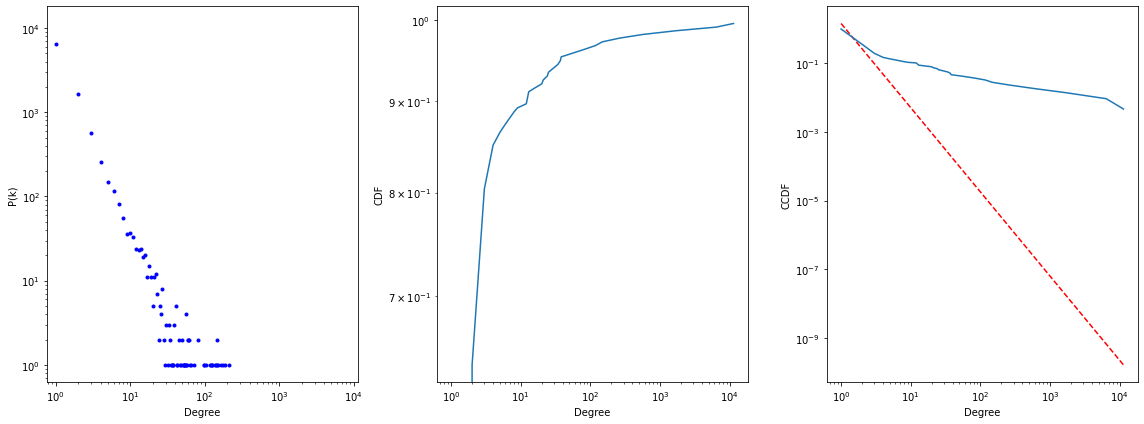

alpha=3.454564244214659 sigma=0.09943196472984064


In [0]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')

plot_dist(G)

## Metrics

In [0]:
G.degree(nbunch=[0]) # compute the degree of a set of nodes (if specified).

DiDegreeView({})

In [0]:
nx.closeness_centrality(G)[0] # compute the closeness centraliry of all nodes (and access the value of node 0)

In [0]:
nx.betweenness_centrality(G)[0] # compute the betweenness centraliry of all nodes (and access the value of node 0)

In [0]:
nx.harmonic_centrality(G)[0]

In [0]:
nx.pagerank(G)[0]

In [0]:
nx.eigenvector_centrality(G)[0]

In [0]:
nx.density(G)

5.523319751213661e-05

In [0]:
nx.triangles(G)[0] # count the triangles each node is involved in (and access the value of node 0)

In [0]:
nx.clustering(G)[0] # compute the local clustering coefficient for all nodes (and access the value for node 0)

In [0]:
nx.average_clustering(G) # compute the global clustering coefficient

In [0]:
list(G.neighbors(0)) # obtain the list of neighobors for node 0

In [0]:
ego = nx.ego_graph(G, 0) # ego network of the node 0
nx.draw(ego, with_labels=True)

In [1]:
nx.number_connected_components(G)

NameError: ignored

In [0]:
comps = list(nx.connected_components(G)) # get a list of connected components (for decreasing size)
comp_1 = nx.subgraph(G, comps[1]) # build a subgraph on the second component
nx.draw(comp_1)

In [0]:
nx.shortest_path(G, source=0, target=30)

In [0]:
nx.shortest_path_length(G, source=0, target=30)

In [2]:
nx.diameter(G.subgraph(comps[0])) # we compute the diameter on the giant component


NameError: ignored